In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
init_state = np.loadtxt("initialStateDistribution.txt")
obs = np.loadtxt("observations.txt", dtype='int')
trans = np.loadtxt("transitionMatrix.txt")
emis_mat = np.loadtxt("emissionMatrix.txt")

In [3]:
n = len(init_state)
m = emis_mat.shape[1]
T = len(obs)

In [4]:
l = np.zeros([n,T]) 
phi = np.zeros([n,T]) 

In [5]:
# initial state
l[:,0] = np.log(init_state) + np.log(emis_mat[:, obs[0]])
phi[:,0] = init_state
s = np.full(T, -1, dtype=int)

In [6]:
alphaDict = dict(zip(range(1,28), string.ascii_lowercase + ' '))

In [7]:
def update(row, col):
    state_trans = l[:,col-1] + np.log(trans[:,row])
    next_l = np.amax(state_trans) + np.log(emis_mat[row, obs[col]])
    most_likely = int(np.argmax(state_trans))
    
    return most_likely, next_l
    
def backtrack(t_idx):
    if t_idx == T-1:
        return int(np.argmax(l[:,T-1]))
    else:
        return int(np.argmax(l[:,t_idx] + np.log(trans[:,s[t_idx+1]])))
        #return phi[s[t_idx+1], t_idx+1]

def Viterbi():
    for t in range(T-1):
        for j in range(n):
            phi[j,t+1], l[j,t+1] = update(j,t+1)
    # backtracking
    for t in range(T-1,-1,-1):
        s[t] = int(backtrack(t))

def plot_HMM():
    plt.plot(s)
    plt.xlabel('time (t)')
    plt.ylabel('Hidden states (s_t)')

def decode():
    message = []
    for t in range(T-1):
        if s[t] != s[t+1]:
            message.append(alphaDict.get(s[t]+1))
    message.append(alphaDict.get(s[T-1]+1))
    return ''.join(message)

In [8]:
Viterbi()

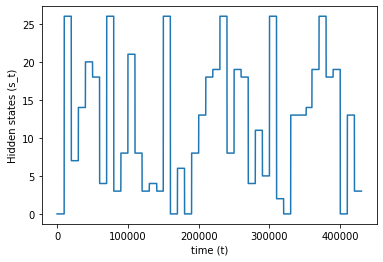

In [9]:
plot_HMM()

In [10]:
hidden_message = decode()
print(hidden_message)

a house divided against itself canot stand
